# GRIP: The Sparks Foundation¶


## Data Science and Business Analytics Intern


Author: Aboubakr Aakou

#### Task 3 : Exploratory Data Analysis - Retail

  * Perform "Exploratory Data Analysis" on dataset "SampleSuperstore" https://bit.ly/3i4rbWI
  * As a business manager, we try to find out the weak areas where you can work to make more profit
  

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# link of data
url ='C:/Users/aboub/Downloads/task3/SampleSuperstore.csv'

In [5]:
# Load the dataset
data = pd.read_csv(url)

In [6]:
# show data
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [7]:
# Check the shape of the dataset
print("Shape of dataset:", data.shape)

Shape of dataset: (9994, 13)


In [9]:
# Calculate the number of missing values (NaN) in each column of the 'data' DataFrame

data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
# show if have duplicated rows
data.duplicated().sum()

17

In [11]:
# Fix duplicated rows in data 
data_cleaned = data.drop_duplicates(inplace=True)

In [12]:
# dataset is cleaned
data.duplicated().sum()

0

In [13]:
# overview of the numerical columns in the dataset
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [14]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

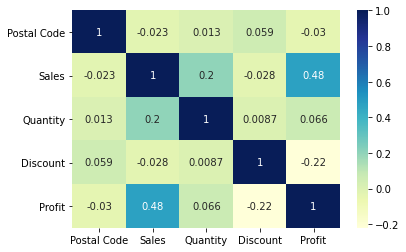

In [15]:
# Check for correlation between the diffrent columns in the dataset 
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [16]:
# show total sales and profit
total_sales = data["Sales"].sum()
total_profit = data["Profit"].sum()

print("Total Sales:", total_sales)
print("Total Profit:", total_profit)


Total Sales: 2296195.5903
Total Profit: 286241.4226


In [17]:
# show sales and profits by category sorted in descending order
sales_by_category = data.groupby("Category")["Sales"].sum().sort_values(ascending=False)
profit_by_category = data.groupby("Category")["Profit"].sum().sort_values(ascending=False)

print("Sales by Category:")
print(sales_by_category)
print("\nProfit by Category:")
print(profit_by_category)


Sales by Category:
Category
Technology         836154.0330
Furniture          741306.3133
Office Supplies    718735.2440
Name: Sales, dtype: float64

Profit by Category:
Category
Technology         145454.9481
Office Supplies    122364.6608
Furniture           18421.8137
Name: Profit, dtype: float64


In [18]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category20
from bokeh.transform import factor_cmap
from bokeh.io import show, output_notebook
output_notebook()
# Create a ColumnDataSource for the sales by category
sales_source = ColumnDataSource(data=dict(categories=sales_by_category.index, 
                                           sales=sales_by_category.values))

# Create a figure object
p_sales = figure(x_range=sales_by_category.index.tolist(), plot_height=400, 
                 title="Total Sales by Category")

# Add a bar chart glyph to the figure object
p_sales.vbar(x='categories', top='sales', width=0.9, source=sales_source, 
              fill_color=factor_cmap('categories', palette=Category20[20], factors=sales_by_category.index.tolist()))

# Set the axis labels
p_sales.xaxis.axis_label = "Category"
p_sales.yaxis.axis_label = "Total Sales"

# Create a ColumnDataSource for the profit by category
profit_source = ColumnDataSource(data=dict(categories=profit_by_category.index, 
                                            profit=profit_by_category.values))

# Create a figure object
p_profit = figure(x_range=profit_by_category.index.tolist(), plot_height=400, 
                  title="Total Profit by Category")

# Add a bar chart glyph to the figure object
p_profit.vbar(x='categories', top='profit', width=0.9, source=profit_source, 
               fill_color=factor_cmap('categories', palette=Category20[20], factors=profit_by_category.index.tolist()))

# Set the axis labels
p_profit.xaxis.axis_label = "Category"
p_profit.yaxis.axis_label = "Total Profit"

# Show the plots
show(p_sales)
show(p_profit)


Loading BokehJS ...

In [19]:
# Calculate and visualize the sales and profits by region
sales_by_region = data.groupby("Region")["Sales"].sum().sort_values(ascending=False)
profit_by_region = data.groupby("Region")["Profit"].sum().sort_values(ascending=False)


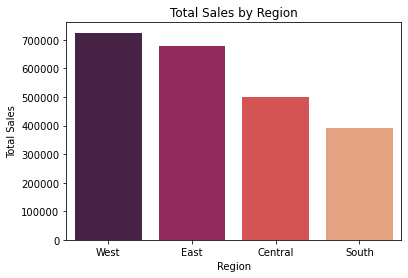

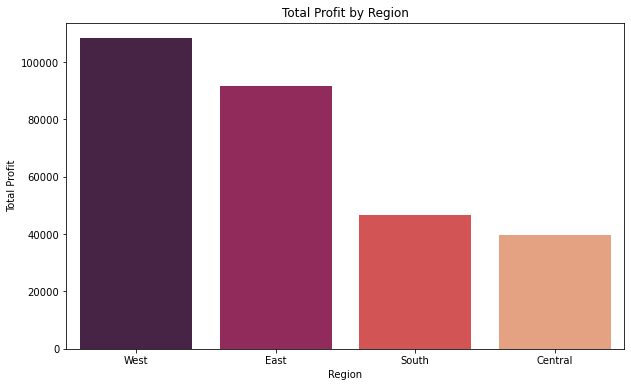

In [20]:
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette="rocket")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=profit_by_region.index, y=profit_by_region.values, palette="rocket")
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.show()

# Conclusion


In this exploratory analysis of the SampleSuperstore dataset, we analyzed the sales and profit by different categories and regions. We found that the office supplies category has the highest sales, while the technology category has the highest profit margin. Additionally, we found that the West region has the highest sales and profit compared to other regions.

Based on these findings, as a business manager, we could focus on increasing sales and profitability in other categories like office Supplies, furniture, and improving sales in underperforming regions like the East and South regions.
We could also investigate the cause of low profitability in some categories like furniture and try to improve the profit margins. Overall, this analysis could help us make informed business decisions and improve the performance of the company.

In [21]:
# save our cleand data
data.to_csv('C:/Users/aboub/Downloads/samplesuperstore_cleaned.csv')